<h1 style='text-align: center'><strong>Support Vector Machines</strong></h1>
<h3 style='text-align: center'>Machine Learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Breast Cancer Classification</strong></h2>

<h4 style='text-align: center'>Using Support Vector Machines (SVM)</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#SVM-Classifier-Model">SVM Classifier Model</a></li>
        <li><a href="#Classification">Classification</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#Explanatory-video">Explanatory video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>
Support Vector Machines (SVM) is a supervised learning model that analyzes data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistic binary linear classifier.

In this notebook, we will demonstrate the use of SVM to classify whether a tumor is malignant or benign using the Breast Cancer dataset from UCI Machine Learning Repository.

<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **SVC from sklearn.svm**: To create and train the Support Vector Classifier model.
- **classification_report and accuracy_score from sklearn.metrics**: To evaluate the model's performance.
- **matplotlib.pyplot**: For plotting the results.

<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>
The Breast Cancer dataset contains various features of cell nuclei present in breast cancer biopsies. The goal is to classify the tumors as malignant or benign based on these features.


In [2]:
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


- **load_breast_cancer from sklearn.datasets**: Loads the Breast Cancer dataset.
- **pd.DataFrame(data.data, columns=data.feature_names)**: Creates a DataFrame `df` with the feature data.
- **df['target'] = data.target**: Adds the target variable (malignant or benign) to the DataFrame.

<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Select the features and target variable
X = df.drop('target', axis=1)
y = df['target']

- **X = df.drop('target', axis=1)**: Selects all features except the target variable.
- **y = df['target']**: Selects the target variable as the label for classification.

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.

<h2 style='text-align: center' id='SVM-Classifier-Model'><strong>6. SVM Classifier Model</strong></h2>

In [5]:
# Create and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

- **model = SVC(kernel='linear')**: Initializes the Support Vector Classifier model with a linear kernel.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).

<h2 style='text-align: center' id='Classification'><strong>7. Classification</strong></h2>

In [6]:
# Make predictions
y_pred = model.predict(X_test)
y_pred


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (`X_test`).

<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



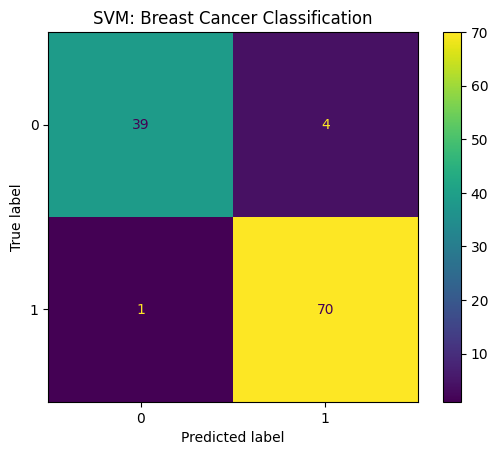

Accuracy: 0.96


In [7]:
# Print the classification report
print(classification_report(y_test, y_pred, zero_division=1))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('SVM: Breast Cancer Classification')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

- **print(classification_report(y_test, y_pred, zero_division=1))**: Generates a classification report showing precision, recall, and F1-score for each class, with `zero_division=1` to handle cases with no predicted samples.
- **ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)**: Plots the confusion matrix for the predictions.
- **accuracy_score(y_test, y_pred)**: Calculates the accuracy of the model on the testing data.
- **print(f'Accuracy: {accuracy:.2f}')**: Prints the accuracy of the model.


<h2 style='text-align: center' id='Explanatory-video'><strong>9. Explanatory video</strong></h2>

<div style='text-align: center'>
    <a href='https://www.instagram.com/p/C9Ft7Wrx4zH/'><img src='Videos/SupportVectorMachines.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>

Prediction for new example: 1


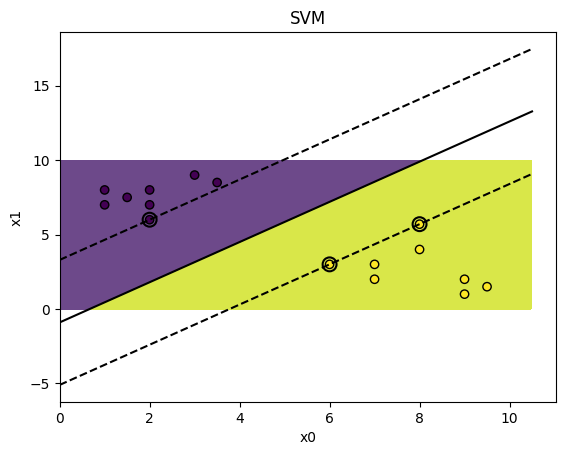

In [29]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Create a sample dataset
data = {
    'x0': [1, 2, 1, 2, 2, 3, 6, 8, 7, 9, 8, 9, 1.5, 3.5, 7, 9.5],
    'x1': [7, 6, 8, 7, 8, 9, 3, 5.7, 3, 1, 4, 2, 7.5, 8.5, 2, 1.5],
    'y':  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# Select the features and target variable
X = df[['x0', 'x1']]
y = df['y']

# Create and train the SVM model
model = SVC(kernel='linear')
model.fit(X, y)

# Make predictions
new_example = pd.DataFrame([[3, 3]], columns=['x0', 'x1'])
prediction = model.predict(new_example)
print("Prediction for new example:", prediction[0])

# Plot the decision boundary
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh to plot the decision boundary
h = .02
x_min, x_max = X['x0'].min() - 1, X['x0'].max() + 1
y_min, y_max = X['x1'].min() - 1, X['x1'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x0', 'x1']))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X['x0'], X['x1'], c=y, edgecolors='k', marker='o')

# Highlight the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=1.5)

# Plot the decision boundary and margins
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(x_min, x_max, 100)
decision_boundary = -w[0] / w[1] * x_plot - b / w[1]
margin1 = decision_boundary + 1 / w[1]
margin2 = decision_boundary - 1 / w[1]

plt.plot(x_plot, decision_boundary, 'k-')
plt.plot(x_plot, margin1, 'k--')
plt.plot(x_plot, margin2, 'k--')

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('SVM')
plt.show()
